In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
BH=np.load('BH.npy')
DS=np.load('DS.npy')
A2C=np.load('A2C.npy')
DQN=np.load('DQN.npy')
PPO=np.load('PPO.npy')
BB=np.load('BB.npy')



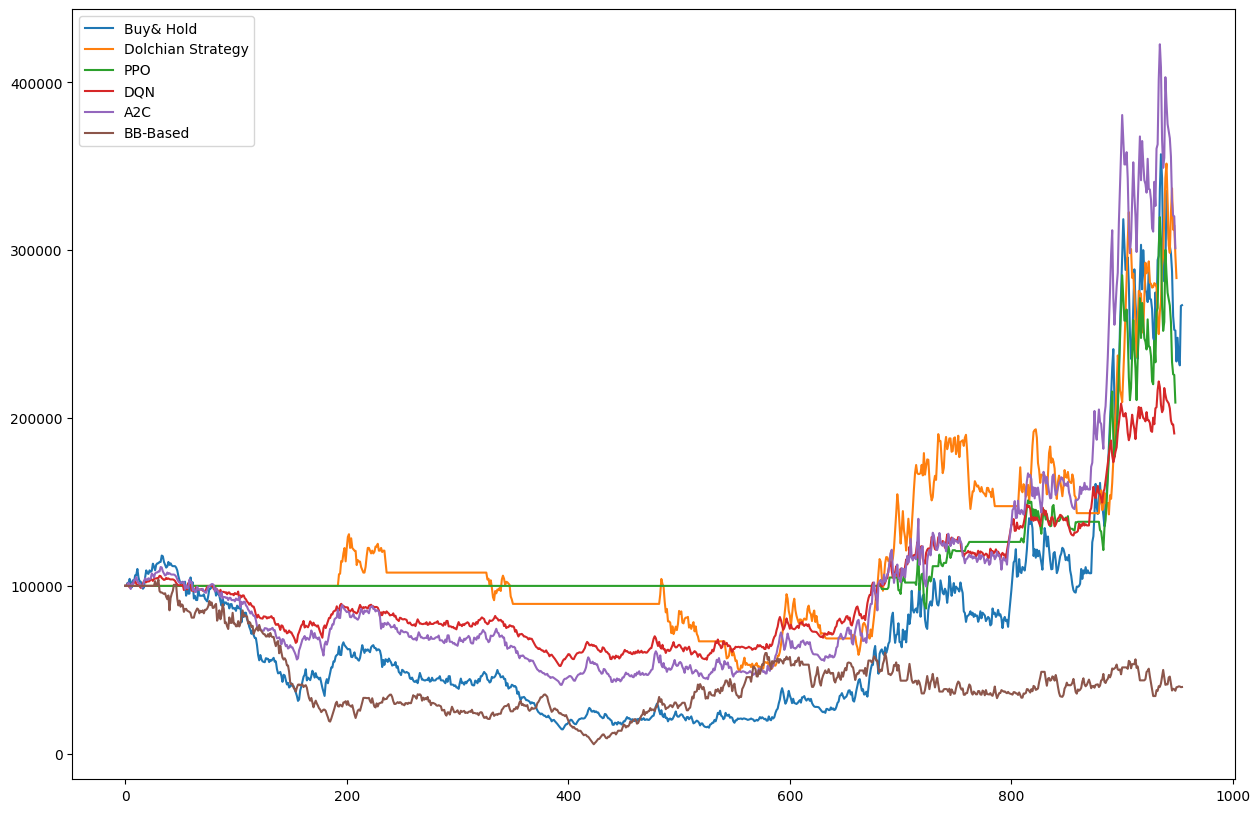

In [40]:
plt.figure(figsize=(15, 10))
plt.plot(BH, label='Buy& Hold')
plt.plot(DS, label='Dolchian Strategy')
plt.plot(PPO, label='PPO')
plt.plot(DQN[:len(BH)], label='DQN')
plt.plot(A2C, label='A2C')
plt.plot(BB[:len(BH)], label='BB-Based')

plt.legend()

In [41]:
def sortino_ratio(returns, target_return=0):
    downside_returns = np.minimum(returns - target_return, 0)
    downside_deviation = np.sqrt(np.mean(np.square(downside_returns)))
    average_return = np.mean(returns)
    sortino_ratio = average_return / downside_deviation
    return 1+10*sortino_ratio
def sharpe_ratio(returns, risk_free_rate=0):
    average_return = np.mean(returns)
    std_deviation = np.std(returns)
    sharpe_ratio = (average_return - risk_free_rate) / std_deviation
    return 1+10*sharpe_ratio
def max_drawdown(prices):
    max_drawdown = 0
    peak = prices[0]
    for price in prices:
        if price > peak:
            peak = price
        drawdown = (peak - price) / peak
        max_drawdown = max(max_drawdown, drawdown)
    return max_drawdown

In [42]:
arr=[BH,DS,A2C,PPO,DQN[:len(BH)],BB[:len(BH)]]
for i in arr:
    print(i[-1])
    stock_prices = i
    stock_returns = np.diff(stock_prices) / stock_prices[:-1]
    sortino = sortino_ratio(stock_returns)
    sharpe= sharpe_ratio(stock_returns)
    maxd=max_drawdown(stock_prices)
    print("Sortino Ratio:", sortino)
    print("Sharpe Ratio:", sharpe)
    print("Maximum Drawdown:", maxd)

267226.8907563025
Sortino Ratio: 1.7176977137863205
Sharpe Ratio: 1.4597786854140098
Maximum Drawdown: 0.8768683274021352
283370.80000000005
Sortino Ratio: 1.769881202297095
Sharpe Ratio: 1.4991143151375073
Maximum Drawdown: 0.62007677317205
301177.99999999977
Sortino Ratio: 1.7839185409073346
Sharpe Ratio: 1.5024953890526187
Maximum Drawdown: 0.6311279647601173
209206.8
Sortino Ratio: 1.7008705511347888
Sharpe Ratio: 1.4438055340630167
Maximum Drawdown: 0.34556531683994646
190821.90000000026
Sortino Ratio: 1.6722732177340722
Sharpe Ratio: 1.4323573127833131
Maximum Drawdown: 0.5066670566219835
39774.214873178535
Sortino Ratio: 1.1140285878617278
Sharpe Ratio: 1.0797102238677738
Maximum Drawdown: 0.9454559320860034
